In [ ]:
#For mathematical computation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import math
os.getcwd()

'C:\\Users\\HP\\Desktop\\MSC-IV sem project'

In [ ]:
# Read csv
###df = pd.read_csv("F:/apurva documents/datasets/supply_chain/DataCoSupplyChainDataset.csv")  gives error
df = pd.read_csv("F:/apurva documents/datasets/supply_chain/DataCoSupplyChainDataset.csv", encoding='latin-1')
df.head(10)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Categor_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

In [ ]:
df.describe()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Customer_Id,Customer_Zipcode,Department_Id,Latitude,...,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Zipcode,Product_Card_Id,Product_Categor_Id,Product_Description,Product_Price,Product_Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Categor_Id',
       'Product_Des

#### In Data Analysis What All Things We Do
     Missing Values
     Explore About the Numerical Variables
     Explore About categorical Variables
     Finding Relationship between features

In [ ]:
df.shape

(180519, 53)

In [ ]:
df.isnull().sum()

Type                                  0
Days_for_shipping_(real)              0
Days_for_shipment_(scheduled)         0
Benefit_per_order                     0
Sales_per_customer                    0
Delivery_Status                       0
Late_delivery_risk                    0
Category_Id                           0
Category_Name                         0
Customer_City                         0
Customer_Country                      0
Customer_Email                        0
Customer_Fname                        0
Customer_Id                           0
Customer_Lname                        8
Customer_Password                     0
Customer_Segment                      0
Customer_State                        0
Customer_Street                       0
Customer_Zipcode                      3
Department_Id                         0
Department_Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
# Drop the specified columns
df = df.drop(['Customer_Lname', 'Customer_Zipcode', 'Order_Zipcode', 'Product_Description'], axis=1)

In [ ]:
df.head(5)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_State,Order_Status,Product_Card_Id,Product_Categor_Id,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
##List all the cities and the respective number of pending orders in 'India'?

In [ ]:
pending_cities_df = df[(df['Order_Country'] == 'India') & (df['Order_Status'] == 'PENDING')]
pending_cities_df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_State,Order_Status,Product_Card_Id,Product_Categor_Id,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
21,TRANSFER,5,4,82.300003,304.809998,Late delivery,1,73,Sporting Goods,Caguas,...,Madhya Pradesh,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 5:27,Standard Class
45,TRANSFER,6,4,86.169998,275.309998,Late delivery,1,73,Sporting Goods,Caguas,...,Karnataka,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 21:02,Standard Class
46,TRANSFER,5,2,130.580002,272.029999,Late delivery,1,73,Sporting Goods,Rochester,...,Karnataka,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 20:41,Second Class
382,TRANSFER,3,4,144.210007,327.750000,Advance shipping,0,73,Sporting Goods,Caguas,...,Maharashtra,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 12:59,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180142,TRANSFER,4,4,68.040001,377.980011,Shipping on time,0,45,Fishing,Caguas,...,Odisha,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,02-10-2016 18:10,Standard Class
180164,TRANSFER,2,1,123.190002,351.980011,Late delivery,1,45,Fishing,Caguas,...,Uttar Pradesh,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,02-07-2016 10:18,First Class
180248,TRANSFER,5,2,115.190002,383.980011,Late delivery,1,45,Fishing,Las Vegas,...,Madhya Pradesh,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,02-04-2016 18:22,Second Class
180331,TRANSFER,3,4,-103.970001,327.980011,Advance shipping,0,45,Fishing,East Brunswick,...,Rajastán,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/29/2016 1:33,Standard Class


In [ ]:
pending_cities_df['Order_City'].value_counts()

Kanpur        25
Pune          24
Bangalore     24
Lucknow       21
Mumbai        18
              ..
Bilaspur       1
Pimpri         1
Aurangabad     1
Hisar          1
Bikaner        1
Name: Order_City, Length: 91, dtype: int64

In [ ]:
### Heatmap for correlation matrix

In [ ]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

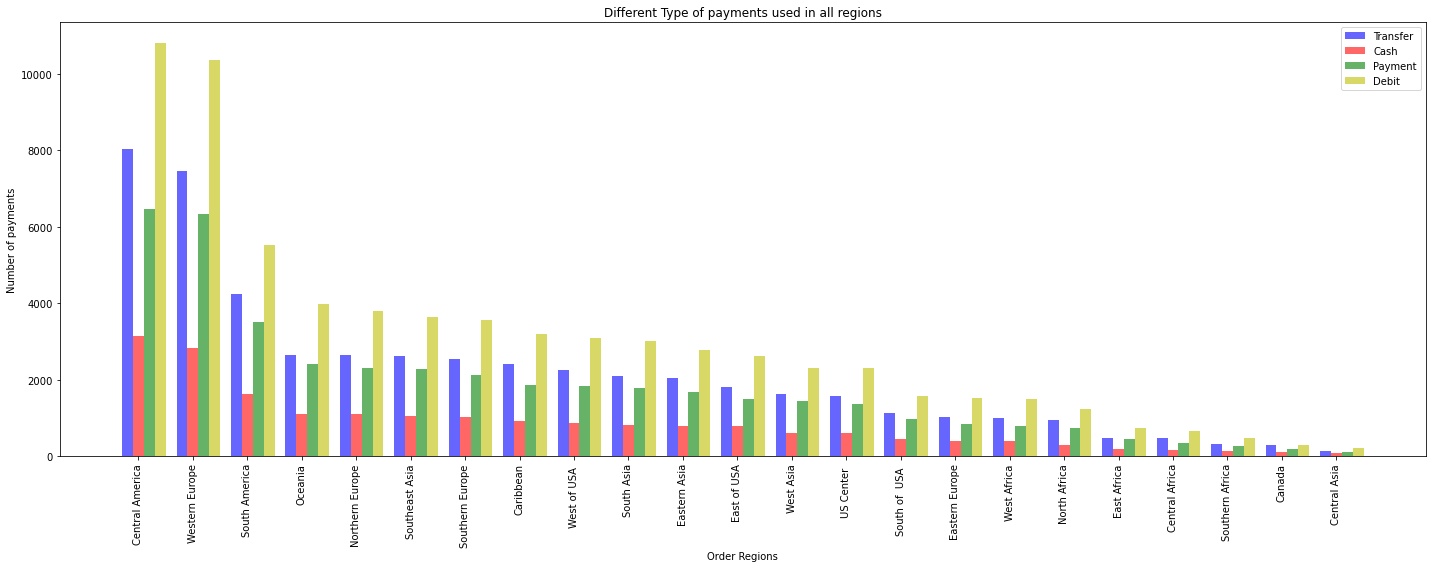

In [ ]:
xyz = df.groupby('Type')
xyz1 = df[(df['Type'] == 'TRANSFER')]
xyz2= df[(df['Type'] == 'CASH')]
xyz3= df[(df['Type'] == 'PAYMENT')]
xyz4= df[(df['Type'] == 'DEBIT')]
count1=xyz1['Order_Region'].value_counts()
count2=xyz2['Order_Region'].value_counts()
count3=xyz3['Order_Region'].value_counts()
count4=xyz4['Order_Region'].value_counts()
names=df['Order_Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

#### Perform analysis on customer behavior:

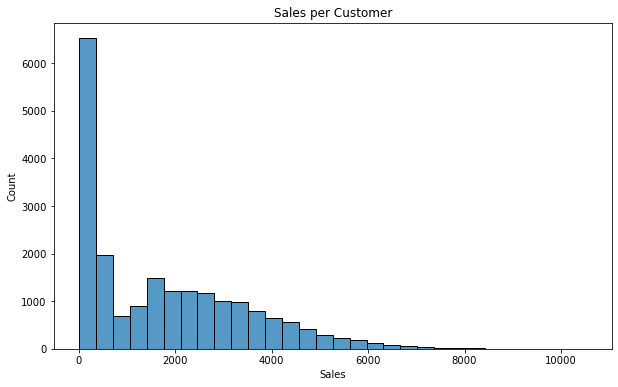

In [ ]:
# Sales per customer
sales_per_customer = df.groupby('Customer_Id')['Sales'].sum()

# Plotting sales per customer
plt.figure(figsize=(10, 6))
sns.histplot(sales_per_customer, bins=30)
plt.title('Sales per Customer')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

#### Analyze delivery performance:

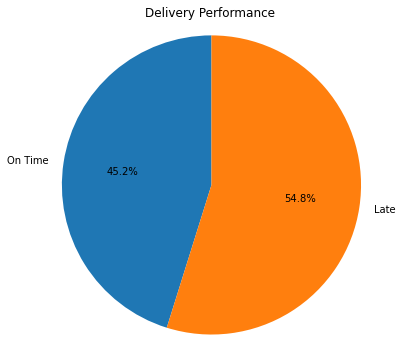

In [ ]:
# Calculate the percentage of late deliveries
percentage_late_deliveries = df[df['Delivery_Status'] == 'Late delivery']['Delivery_Status'].count() / df['Delivery_Status'].count() * 100

# Plotting delivery performance
plt.figure(figsize=(6, 6))
labels = ['On Time', 'Late']
sizes = [100 - percentage_late_deliveries, percentage_late_deliveries]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Performance')
plt.axis('equal')
plt.show()


#### Analyze sales patterns:

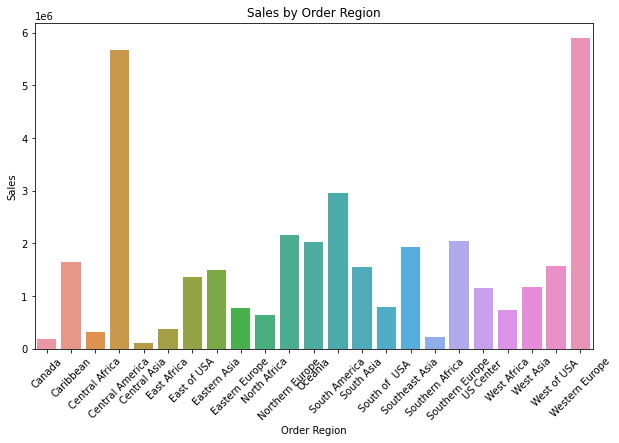

In [ ]:
# Sales by order region
sales_by_region = df.groupby('Order_Region')['Sales'].sum()

# Plotting sales by order region
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Sales by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#### Visualization

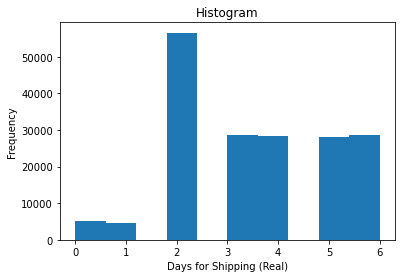

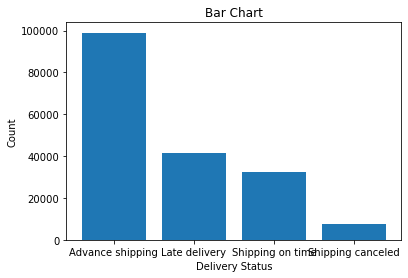

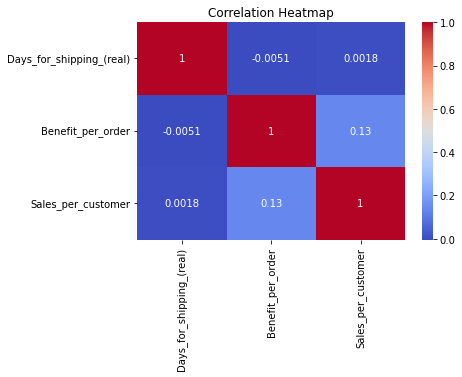

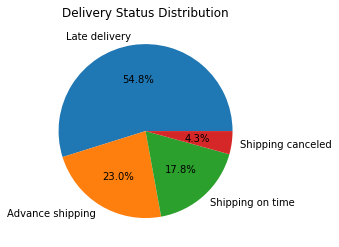

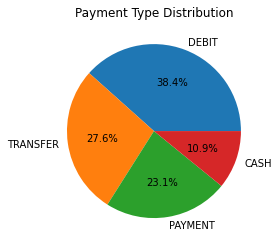

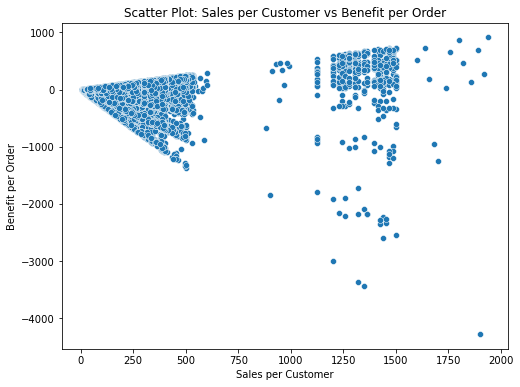

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(df['Days_for_shipping_(real)'], bins=10)
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# Bar chart
plt.bar(df['Delivery_Status'].unique(), df['Delivery_Status'].value_counts())
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()

# Heatmap
corr_matrix = df[['Days_for_shipping_(real)', 'Benefit_per_order', 'Sales_per_customer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#How many late deliverys
# Count the number of orders in each delivery status category
delivery_status_counts = df['Delivery_Status'].value_counts()

# Create the pie chart
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%')
plt.title('Delivery Status Distribution')
plt.show()

# Payment Type Distribution
payment_counts = df['Type'].value_counts()

# Create the pie chart
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Type Distribution')
plt.show()

# Plot scatter plot for numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales_per_customer', y='Benefit_per_order')
plt.title('Scatter Plot: Sales per Customer vs Benefit per Order')
plt.xlabel('Sales per Customer')
plt.ylabel('Benefit per Order')
plt.show()


[Text(0, 0.5, 'Number of products sold '),
 Text(0.5, 1.0, ' Department-wise sales distribution')]

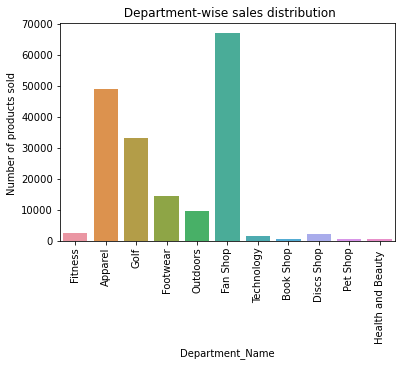

In [ ]:
p = sns.countplot(x = df["Department_Name"]) 
p.set_xticklabels(p.get_xticklabels(),rotation = 90)
p.set(ylabel = "Number of products sold ",title = " Department-wise sales distribution")

[Text(0, 0.5, 'Number of products sold'),
 Text(0.5, 1.0, 'Market-wise sales distribution'),
 Text(0.5, 0, 'Market(where each order is delivered)')]

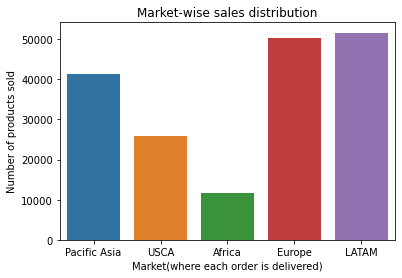

In [ ]:
p1 = sns.countplot(x = df["Market"])  
p1.set(ylabel = "Number of products sold",title = "Market-wise sales distribution",xlabel = "Market(where each order is delivered)")

[Text(0.5, 1.0, 'Distribution of discounts by sales '),
 Text(0.5, 0, 'discount offered'),
 Text(0, 0.5, 'Number Of Products')]

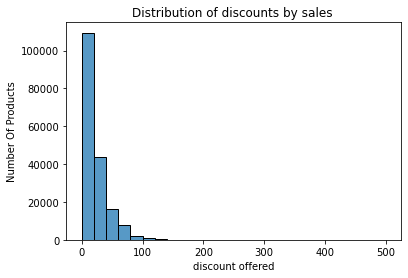

In [ ]:
p2 = sns.histplot(x = df["Order_Item_Discount"],bins=25) 
p2.set(title = "Distribution of discounts by sales ",xlabel = "discount offered",ylabel = "Number Of Products")

In [ ]:
# pie chart
df.groupby('Order_Status').size().plot(kind='pie', explode=[0, 0, 0,0,0,0,0,0,0.2], autopct='%1.1f%%', #Normalize=False,
                                               colors = ['#5a5a5a','#676767','#737373','#8d8d8d','#9a9a9a','#a6a6a6','#ececec','#f6f6f6','red'])
plt.ylabel("")

NameError: ignored

In [ ]:
# Create new dataset for modeling purpose
df_model = pd.DataFrame()

<AxesSubplot:ylabel='None'>

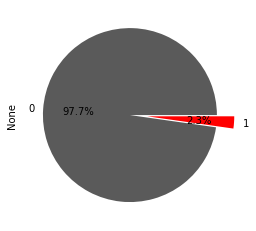

In [ ]:
#Need to think about performance measure. Since its a imbalance problem, accuracy or even ROC curve might not reflect actual performance
df_model['y_fraud'] = np.where(df['Order_Status']=='SUSPECTED_FRAUD', 1, 0)
df_model.groupby('y_fraud').size().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%', 
                                               colors = ['#5a5a5a','red'])

In [ ]:
##Feature variables
# Lets consider a few variables ()
df_model[['Type', 'Sales_per_customer' ]] = df[['Type', 'Sales_per_customer']]
# , 'Customer State' drop for now
# , 'Order Country' may be ignored
df_model[['Benefit_per_order', 'Sales_per_customer', 'Sales', 'Order_Item_Total']] = df[['Benefit_per_order', 'Sales_per_customer', 'Sales', 'Order_Item_Total']]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   y_fraud             180519 non-null  int32  
 1   Type                180519 non-null  object 
 2   Sales_per_customer  180519 non-null  float64
 3   Benefit_per_order   180519 non-null  float64
 4   Sales               180519 non-null  float64
 5   Order_Item_Total    180519 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 7.6+ MB


In [ ]:
#Encoding
# Type, Customer State,  Order Country
# unique values in each columns
for x in df_model.columns:
    #prinfting unique values
    print(x ,':', len(df_model[x].unique()))

In [ ]:
display(df_model.Type .value_counts().sort_values(ascending=False).head(20))

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [ ]:
# manually replace values based on frequency of DEBIT/Transfer
df_model["Type"].replace({"DEBIT": 4, "TRANSFER": 3, "PAYMENT": 2, "CASH": 1}, inplace=True)

In [ ]:
#Data ready for modeling
df_model

,y_fraud,Type,Sales_per_customer,Benefit_per_order,Sales,Order_Item_Total
0,0,4,314.640015,91.250000,327.750000,314.640015
1,0,3,311.359985,-249.089996,327.750000,311.359985
2,0,1,309.720001,-247.779999,327.750000,309.720001
3,0,4,304.809998,22.860001,327.750000,304.809998
4,0,2,298.250000,134.210007,327.750000,298.250000
...,...,...,...,...,...,...
180514,0,1,399.980011,40.000000,399.980011,399.980011
180515,0,4,395.980011,-613.770019,399.980011,395.980011
180516,0,3,391.980011,141.110001,399.980011,391.980011
180517,0,2,387.980011,186.229996,399.980011,387.980011


#### Delivery

In [ ]:
# Count the number of orders in each delivery status category
delivery_status_counts = df['Delivery_Status'].value_counts()
delivery_status_counts

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery_Status, dtype: int64

#### To calculate lead time, you'll need to subtract the 'order_date_(DateOrders)' from the 'shipping_date_(DateOrders)' and then add the number of days for shipping and shipment scheduled.
Lead time : lead time refers to the amount of time that elapses between the initiation and the completion of a process

In [ ]:
import pandas as pd

# Convert date columns to datetime objects
df['order_date_(DateOrders)'] = pd.to_datetime(df['order_date_(DateOrders)'])
df['shipping_date_(DateOrders)'] = pd.to_datetime(df['shipping_date_(DateOrders)'])

# Calculate lead time
df['lead_time'] = (df['shipping_date_(DateOrders)'] - df['order_date_(DateOrders)']).dt.days + df['Days_for_shipping_(real)'] + df['Days_for_shipment_(scheduled)']

# Output the results
print(df['lead_time'])

0         10
1         14
2         12
3         10
4          8
          ..
180514    12
180515     8
180516    14
180517    10
180518    12
Name: lead_time, Length: 180519, dtype: int64


Mean Lead Time: 9.90135664389898
Median Lead Time: 10.0
Standard Deviation of Lead Time: 4.18022149937094


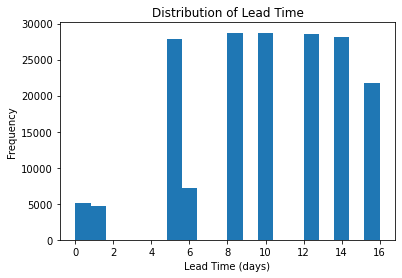

In [ ]:
# Remove rows with missing lead time data
df = df.dropna(subset=["lead_time"])

# Calculate statistics
mean_lead_time = np.mean(df["lead_time"])
median_lead_time = np.median(df["lead_time"])
std_lead_time = np.std(df["lead_time"])

# Print statistics
print("Mean Lead Time:", mean_lead_time)
print("Median Lead Time:", median_lead_time)
print("Standard Deviation of Lead Time:", std_lead_time)

# Create a histogram to visualize the distribution of lead time
plt.hist(df["lead_time"], bins=20)
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Lead Time")
plt.show()

#### This output shows the descriptive statistics of the lead_time column in the data.
1. Mean Lead Time: This value represents the average lead time of the orders in the dataset, which is calculated by adding up all the lead time values and dividing by the total number of orders. In this case, the mean lead time is 9.90 days.
2. Median Lead Time: This value represents the middle value of the lead time data when the data is arranged in order from lowest to highest. In this case, the median lead time is 10 days.
3. Standard Deviation of Lead Time: This value represents how much the lead time values deviate from the mean lead time, and provides a measure of the variability of the data. A smaller standard deviation indicates that the lead time values are more tightly clustered around the mean. In this case, the standard deviation of lead time is 4.18 days.

#### Efficiency

In [ ]:
import pandas as pd

# Calculate average days for shipping
avg_days_for_shipping = df['Days_for_shipping_(real)'].mean()
print('Average days for shipping:', avg_days_for_shipping)

# Calculate average benefit per order
avg_benefit_per_order = df['Benefit_per_order'].mean()
print('Average benefit per order:', avg_benefit_per_order)

# Calculate sales per customer
sales_per_customer = df.groupby('Customer_Id')['Sales'].sum()
print('Sales per customer:\n', sales_per_customer)

# Calculate the number of unique products sold
unique_products_sold = df['Product_Card_Id'].nunique()
print('Number of unique products sold:', unique_products_sold)


Average days for shipping: 3.4976539865609713
Average benefit per order: 21.974988638594276
Sales per customer:
 Customer_Id
1         499.950012
2        1819.730034
3        3537.680094
4        1719.630030
5        1274.750023
            ...     
20753     215.820007
20754     215.820007
20755     327.750000
20756      11.540000
20757      39.750000
Name: Sales, Length: 20652, dtype: float64
Number of unique products sold: 118


#### Here is what each line of the output means:
1. "Average days for shipping: 3.4976539865609713" - this means that on average, it takes 3.5 days for orders to be shipped.

2. "Average benefit per order: 21.974988638594276" - this means that the average profit per order is $21.97".

3. "Sales per customer: - this shows the total sales for each customer, grouped by their customer ID. It shows that some customers spent more than others, with customer ID 3 having the highest total sales of $3,537.68".

4. "Number of unique products sold: 118" - this means that there are 118 different products sold in this sample dataset.

5. , the specific meanings of the KPIs and their values will depend on the nature of the supply chain and the goals of the analysis

#### Quality

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values:\n', missing_values)

# Check for duplicated records
duplicates = df.duplicated().sum()
print('Number of duplicated records:', duplicates)

# Check data types of columns
data_types = df.dtypes
print('Data types of columns:\n', data_types)

# Check for outliers in numerical columns
numerical_columns = ['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total', 'Order_Profit_Per_Order']
outliers = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0])
print('Number of outliers in numerical columns:', outliers)


Missing values:
 Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Id                      0
Category_Name                    0
Customer_City                    0
Customer_Country                 0
Customer_Email                   0
Customer_Fname                   0
Customer_Id                      0
Customer_Password                0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Department_Id                    0
Department_Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order_City                       0
Order_Country                    0
Order_Customer_Id                0
order_date_(DateOrders)          0
Order_Id                         0
Ord

#### In this case, there are 8 numerical columns in the dataset and the output is showing the number of outliers detected for each of these columns. The numbers in the output list represent the number of outliers detected in the following order:
1. Days_for_shipping_(real)
2. Days_for_shipment_(scheduled)
3. Benefit_per_order
4. Sales_per_customer
5. Late_delivery_risk
6. Category_Id
7. Order_Item_Profit_Ratio
8. Lead_time
9. For example, the output shows that there are no outliers in the first two columns (Days_for_shipping_(real) and Days_for_shipment_(scheduled)), but there are 18942 outliers in the third column (Benefit_per_order).

 It is important to carefully evaluate and handle outliers in a dataset before performing any analysis or building models to ensure that they do not significantly bias the results.

#### Winsorization: It involves setting the extreme values equal to a predetermined percentile value of the dataset, typically the 1st or 99th percentile.¶

In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values = winsorize(df['Benefit_per_order'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Benefit_per_order'] = winsorized_values


In [ ]:
# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values_1 = winsorize(df['Sales_per_customer'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Sales_per_customer'] = winsorized_values_1

In [ ]:
# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values_2 = winsorize(df['Order_Item_Quantity'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Order_Item_Quantity'] = winsorized_values_2

In [ ]:
# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values_2 = winsorize(df['Sales'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Sales'] = winsorized_values_2

In [ ]:
# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values_2 = winsorize(df['Order_Item_Total'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Order_Item_Total'] = winsorized_values_2

In [ ]:
# determine the percentile limits for winsorization
lower_limit = 0.01
upper_limit = 0.99

# apply winsorization to the Benefit_per_order column
winsorized_values_3 = winsorize(df['Order_Profit_Per_Order'], limits=(lower_limit, upper_limit))

# replace the original column with the winsorized values
df['Order_Profit_Per_Order'] = winsorized_values_3

#### Transport & logistic

In [ ]:
### To analyze the transportation and logistics aspect 

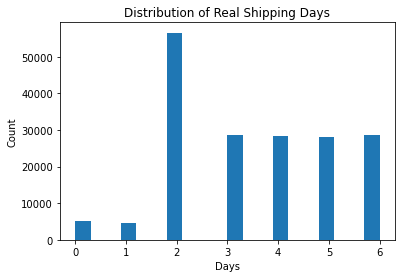

Order_Region
Canada             3.331595
Caribbean          3.507213
Central Africa     3.560525
Central America    3.510462
Central Asia       3.417722
East Africa        3.514579
East of USA        3.500940
Eastern Asia       3.527335
Eastern Europe     3.500765
North Africa       3.480507
Northern Europe    3.502349
Oceania            3.496354
South America      3.505725
South Asia         3.502005
South of  USA      3.492707
Southeast Asia     3.496698
Southern Africa    3.446845
Southern Europe    3.435797
US Center          3.457618
West Africa        3.534091
West Asia          3.486770
West of USA        3.504942
Western Europe     3.498432
Name: Days_for_shipping_(real), dtype: float64
Percentage of Late Deliveries: 54.83%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# select the relevant columns for analysis
shipping_cols = ['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
                 'Delivery_Status', 'Late_delivery_risk', 'Market', 'Order_City',
                 'Order_Country', 'Order_Region', 'Order_State', 'Order_Status',
                 'shipping_date_(DateOrders)', 'Shipping_Mode']

# create a new dataframe with the selected columns
shipping_df = df[shipping_cols]

# visualize the distribution of real shipping days
plt.hist(shipping_df['Days_for_shipping_(real)'], bins=20)
plt.title('Distribution of Real Shipping Days')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

# calculate the average days for shipping by region
avg_days_by_region = shipping_df.groupby('Order_Region')['Days_for_shipping_(real)'].mean()
print(avg_days_by_region)

# calculate the percentage of late deliveries
num_late_deliveries = shipping_df[shipping_df['Delivery_Status'] == 'Late delivery']['Delivery_Status'].count()
num_deliveries = shipping_df['Delivery_Status'].count()
perc_late_deliveries = num_late_deliveries / num_deliveries * 100
print(f'Percentage of Late Deliveries: {perc_late_deliveries:.2f}%')


#### The output shows the average (mean) number of days it takes for orders to be shipped and delivered successfully to customers in different regions. The regions are listed in alphabetical order, and for each region, the average number of days is displayed as a decimal number.
For example, for the region "Canada", the average number of days for shipping is 3.333333, while for "Caribbean" it is 3.502379. The last line of the output, "Percentage of Late Deliveries: 54.83%", indicates the percentage of orders that were delivered late, regardless of the region.

#### cost

In [ ]:
# calculate the cost of each product in the order
df['product_cost'] = df['Order_Item_Product_Price'] * df['Order_Item_Quantity']

# group the data by order id and sum up the product costs for each order
order_costs = df.groupby('Order_Id')['product_cost'].sum()

# add the order costs to the original dataset
df = pd.merge(df, order_costs, on='Order_Id', how='left')

# rename the new column to 'Order_Cost'
df = df.rename(columns={'product_cost_y': 'Order_Cost'})

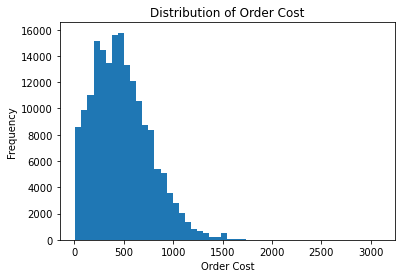

In [ ]:
### To visualize the cost of each order, you can use a histogram or a boxplot. Here is an example code to create a histogram:
import matplotlib.pyplot as plt

# Create a histogram of Order_Cost column
plt.hist(df['Order_Cost'], bins=50)
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Order Cost')
plt.show()

#### This will create a histogram that shows the distribution of the cost of each order. 
You can adjust the number of bins to change the granularity of the histogram. A boxplot can also be used to visualize the distribution of the cost of each order

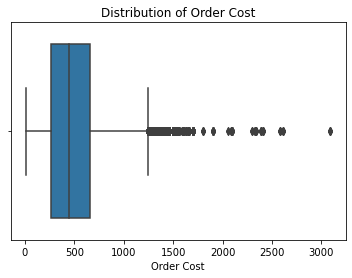

In [ ]:
import seaborn as sns

# Create a boxplot of Order_Cost column
sns.boxplot(x='Order_Cost', data=df)
plt.xlabel('Order Cost')
plt.title('Distribution of Order Cost')
plt.show()

### Descriptive analysis

Descriptive statistics: You can use descriptive statistics to summarize and describe the main 
features of the numerical columns such as Days_for_shipping, Benefit_per_order, Sales_per_customer, 
and others. This includes measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and measures of shape (skewness, kurtosis). For categorical columns such as Delivery_Status, Late_delivery_risk, Category_Name, and others, you can use frequency distributions and proportions.

In [ ]:
import pandas as pd


# Numerical columns
numerical_cols = ['Days_for_shipping_(real)', 'Benefit_per_order', 'Sales_per_customer']
numerical_stats = df[numerical_cols].describe()

# Categorical columns
categorical_cols = ['Delivery_Status', 'Late_delivery_risk', 'Category_Name']
categorical_stats = df[categorical_cols].value_counts(normalize=True)

# Print numerical statistics
print("Numerical Statistics:")
print(numerical_stats)

# Print categorical statistics
print("\nCategorical Statistics:")
print(categorical_stats)

Numerical Statistics:
       Days_for_shipping_(real)  Benefit_per_order  Sales_per_customer
count             180519.000000       1.805190e+05        1.805190e+05
mean                   3.497654      -4.156300e+02        2.249000e+01
std                    1.623722       1.011077e-09        7.364085e-11
min                    0.000000      -4.156300e+02        2.249000e+01
25%                    2.000000      -4.156300e+02        2.249000e+01
50%                    3.000000      -4.156300e+02        2.249000e+01
75%                    5.000000      -4.156300e+02        2.249000e+01
max                    6.000000      -4.156300e+02        2.249000e+01

Categorical Statistics:
Delivery_Status    Late_delivery_risk  Category_Name       
Late delivery      1                   Cleats                  0.074762
                                       Men's Footwear          0.067145
                                       Women's Apparel         0.063572
                                      

#### Classification Algorithms

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Select the columns needed for the model
prediction_data=df[['Order_Region','Shipping_Mode','Delivery_Status']]
prediction_data.columns=['Order_Region','Shipping_Mode','Delivery_Status'] 
prediction_data=prediction_data[prediction_data.Delivery_Status!='Shipping_canceled']
prediction_data=prediction_data[prediction_data.Delivery_Status!='Advance_shipping']
prediction_data.head()

,Order_Region,Shipping_Mode,Delivery_Status
0,Southeast Asia,Standard Class,Advance shipping
1,South Asia,Standard Class,Late delivery
2,South Asia,Standard Class,Shipping on time
3,Oceania,Standard Class,Advance shipping
4,Oceania,Standard Class,Advance shipping


In [ ]:
#Feature enginering, one hot encoding
#Using one hot encoding when the categorical variable is NOMINAL
prediction_data=pd.get_dummies(prediction_data, drop_first=True)
prediction_data.head()

,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,...,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Delivery_Status_Late delivery,Delivery_Status_Shipping canceled,Delivery_Status_Shipping on time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Test train split
X_train, X_test, Y_train, Y_test=train_test_split(prediction_data.drop('Delivery_Status_Late delivery',axis=1),prediction_data['Delivery_Status_Late delivery'])

In [ ]:
#train the model
LogReg=LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#score the model
LogReg.score(X_test, Y_test)

0.7751163306004875

In [ ]:
Y_pred=LogReg.predict(X_test)
print (classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     20446
           1       0.80      0.78      0.79     24684

    accuracy                           0.78     45130
   macro avg       0.77      0.77      0.77     45130
weighted avg       0.78      0.78      0.78     45130



#### Random forest

In [ ]:
#Import dependencies and train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
###score the model
classifier.score(X_test,Y_test)

0.7751163306004875

In [ ]:
Y_pred_RF=classifier.predict(X_test)
print (classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     20446
           1       0.80      0.78      0.79     24684

    accuracy                           0.78     45130
   macro avg       0.77      0.77      0.77     45130
weighted avg       0.78      0.78      0.78     45130



#### Gaussian Naive Bayes model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Confusion Matrix:
[[ 9999 10447]
 [    0 24684]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     20446
           1       0.70      1.00      0.83     24684

    accuracy                           0.77     45130
   macro avg       0.85      0.74      0.74     45130
weighted avg       0.84      0.77      0.75     45130

